# `focus.ctfapply` Tutorial

## Getting started

For this tutorial, we will download an already aligned, dose-weighted and averaged micrograph from [EMPIAR-10195](EMPIAR-10195) as an example for applying/correcting for the CTF, and denoising.

In [ ]:
%%bash

wget ftp://ftp.ebi.ac.uk/pub/databases/empiar/archive/10195/data/alignaver-DW/asyn-cc121-260917_530_Sep27_03_59_10.mrc

Let's take a look at the micrograph using Python:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg # Let's display with matplotlib so the output sticks with the notebook
import mrcz

In [3]:
# We first load the micrograph as a NumPy array using MRCZ:
mrc = mrcz.ioMRC.readMRC('asyn-cc121-260917_530_Sep27_03_59_10.mrc')[0][0]

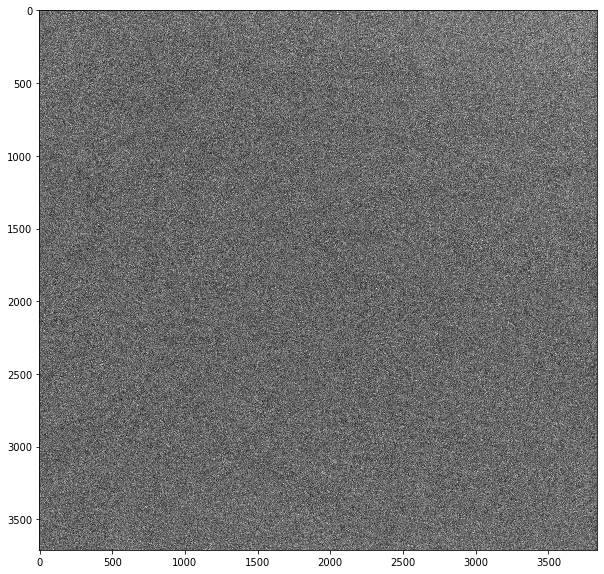

In [4]:
plt.rcParams['figure.figsize'] = [10,10] # To make figures appear larger
plt.imshow(mrc,cmap=cm.gray)

## Applying the CTF to an image

From [CTFFIND4](http://grigoriefflab.janelia.org/ctffind4) using an amplitude contrast value of 0.10, the estimated defocus for this micrograph is:

```
Estimated defocus values        : 13592.07 , 13545.50 Angstroms
Estimated azimuth of astigmatism: -6.35 degrees
```

We can use this information to "correct" for the CTF (i.e. flip the phases and change the amplitudes) like:

In [5]:
%%bash

focus.ctfapply asyn-cc121-260917_530_Sep27_03_59_10.mrc --angpix 0.831 --cs 2.7 --kv 300 --ampcon 0.1 --df1 13592.07 --df2 13545.50 --ast -6.35 --ctf_multiply

Casting asyn-cc121-260917_530_Sep27_03_59_10_cm.mrc to `numpy.float64`


Of course, the same approach can be used to apply the CTF onto a noiseless image (e.g. a 2D projection from a 3D volume).  
Besides `--ctf_multiply`, other options for CTF correction/application are `--phase_flip` and `--wiener_filter`.

## Denoising

Even after applying any one of the CTF correction schemes above, one can barely "see" anything on a typical cryo-EM micrograph. The process of making a low-dose TEM image "interpretable" (or at least visually pleasant) is called _denoising_.  
In `focus.ctfapply`, the denoising filter devised by [Dimitry Tegunov](https://github.com/dtegunov) for [Warp](http://warpem.com) [[Tegunov & Cramer, bioRxiv (2018)](https://doi.org/10.1101/338558 )] is implemented:

In [6]:
%%bash

focus.ctfapply asyn-cc121-260917_530_Sep27_03_59_10.mrc --angpix 0.831 --cs 2.7 --kv 300 --ampcon 0.1 --df1 13592.07 --df2 13545.50 --ast -6.35 --denoise

Casting asyn-cc121-260917_530_Sep27_03_59_10_wf-denoised.mrc to `numpy.float64`


Now, let's take a look at the denoised micrograph:

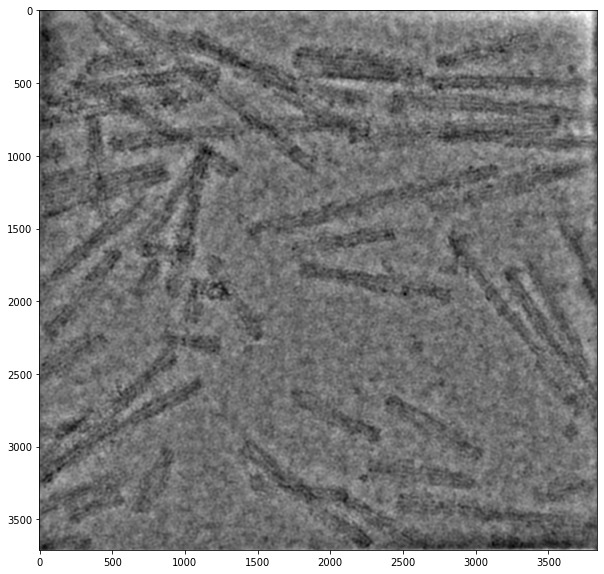

In [7]:
mrc_denoised = mrcz.ioMRC.readMRC('asyn-cc121-260917_530_Sep27_03_59_10_wf-denoised.mrc')[0]
plt.imshow(mrc_denoised,cmap=cm.gray)

## Simulating CTF profiles

`focus.ctfapply` can also be used to generate simulated 1D and 2D CTF curves.  
For example, using the parameters from the micrograph above, plus an arbitrary B-factor of 100 A^2 to simulate a resolution-dependent envelope decay:

In [12]:
%%bash

focus.ctfapply --angpix 0.831 --cs 2.7 --kv 300 --ampcon 0.1 --df1 13592.07 --df2 13545.50 --ast -6.35 --bfac 100 --save_ctf_1d --save_ctf_2d

Casting ctf_2d.mrc to `numpy.float64`


The results are saved by default as `ctf_1d.png` for the 1D case, and `ctf_2d.mrc` and `ctf_2d-power_spectrum.mrc` for the 2D case.

In 2D, the CTF itself looks like:

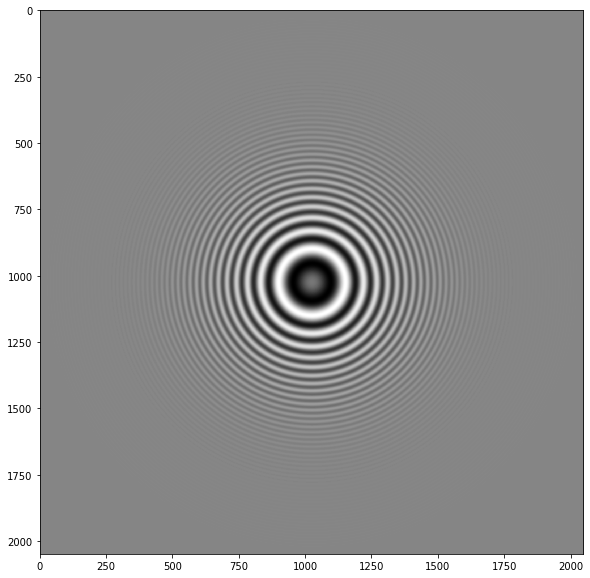

In [13]:
ctf = mrcz.ioMRC.readMRC('ctf_2d.mrc')[0]
plt.imshow(ctf,cmap=cm.gray)

And the power spectrum (squared amplitudes):

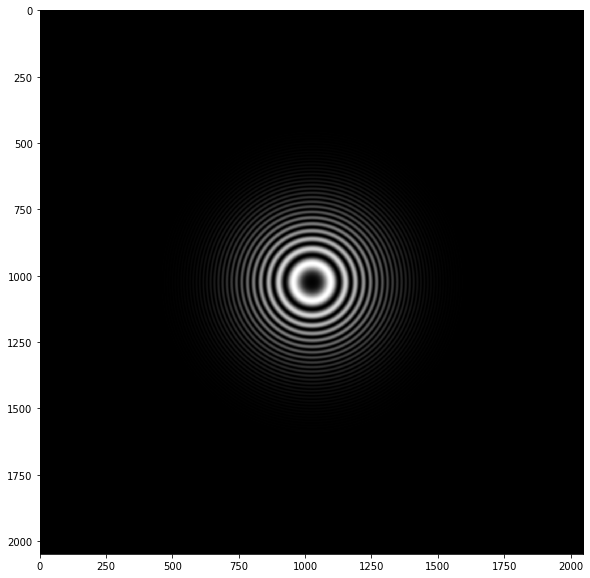

In [14]:
ps = mrcz.ioMRC.readMRC('ctf_2d-power_spectrum.mrc')[0]
plt.imshow(ps,cmap=cm.gray)

Finally, we can also look at the 1D profile of the CTF (astigmatism is ignored in this case and the two orthogonal defocii values are averaged):

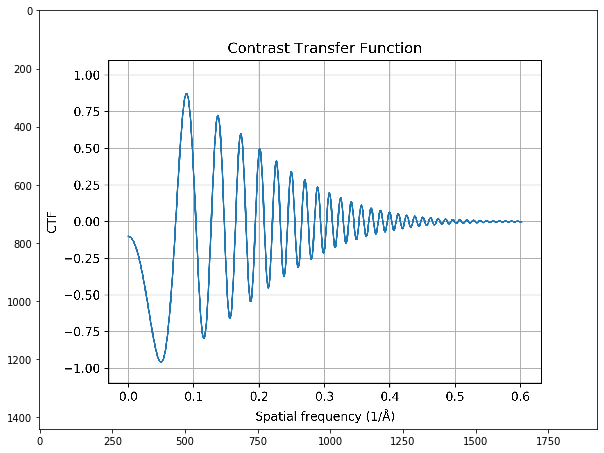

In [15]:
ctf = mpimg.imread('ctf_1d.png')
plt.imshow(ctf)